In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv('ForbesBillionaires.csv')

In [8]:
df.head()

,Rank,Name,Networth,Age,Country,Source,Industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments


In [9]:
df.shape

(2600, 7)

In [10]:
df.info

<bound method DataFrame.info of       Rank                        Name  Networth  Age        Country  \
0         1                 Elon Musk      219.0   50  United States   
1         2                Jeff Bezos      171.0   58  United States   
2         3  Bernard Arnault & family      158.0   73         France   
3         4                Bill Gates      129.0   66  United States   
4         5            Warren Buffett      118.0   91  United States   
...     ...                        ...       ...  ...            ...   
2595   2578    Jorge Gallardo Ballart        1.0   80          Spain   
2596   2578              Nari Genomal        1.0   82    Philippines   
2597   2578            Ramesh Genomal        1.0   71    Philippines   
2598   2578            Sunder Genomal        1.0   68    Philippines   
2599   2578     Horst-Otto Gerberding        1.0   69        Germany   

                      Source                Industry  
0              Tesla, SpaceX             Automot

In [11]:
df.describe

<bound method NDFrame.describe of       Rank                        Name  Networth  Age        Country  \
0         1                 Elon Musk      219.0   50  United States   
1         2                Jeff Bezos      171.0   58  United States   
2         3  Bernard Arnault & family      158.0   73         France   
3         4                Bill Gates      129.0   66  United States   
4         5            Warren Buffett      118.0   91  United States   
...     ...                        ...       ...  ...            ...   
2595   2578    Jorge Gallardo Ballart        1.0   80          Spain   
2596   2578              Nari Genomal        1.0   82    Philippines   
2597   2578            Ramesh Genomal        1.0   71    Philippines   
2598   2578            Sunder Genomal        1.0   68    Philippines   
2599   2578     Horst-Otto Gerberding        1.0   69        Germany   

                      Source                Industry  
0              Tesla, SpaceX             Autom

In [12]:
df.columns

Index(['Rank ', 'Name', 'Networth', 'Age', 'Country', 'Source', 'Industry'], dtype='object')

In [13]:
# lets check for missing values
df.isnull().sum()

Rank        0
Name        0
Networth    0
Age         0
Country     0
Source      0
Industry    0
dtype: int64

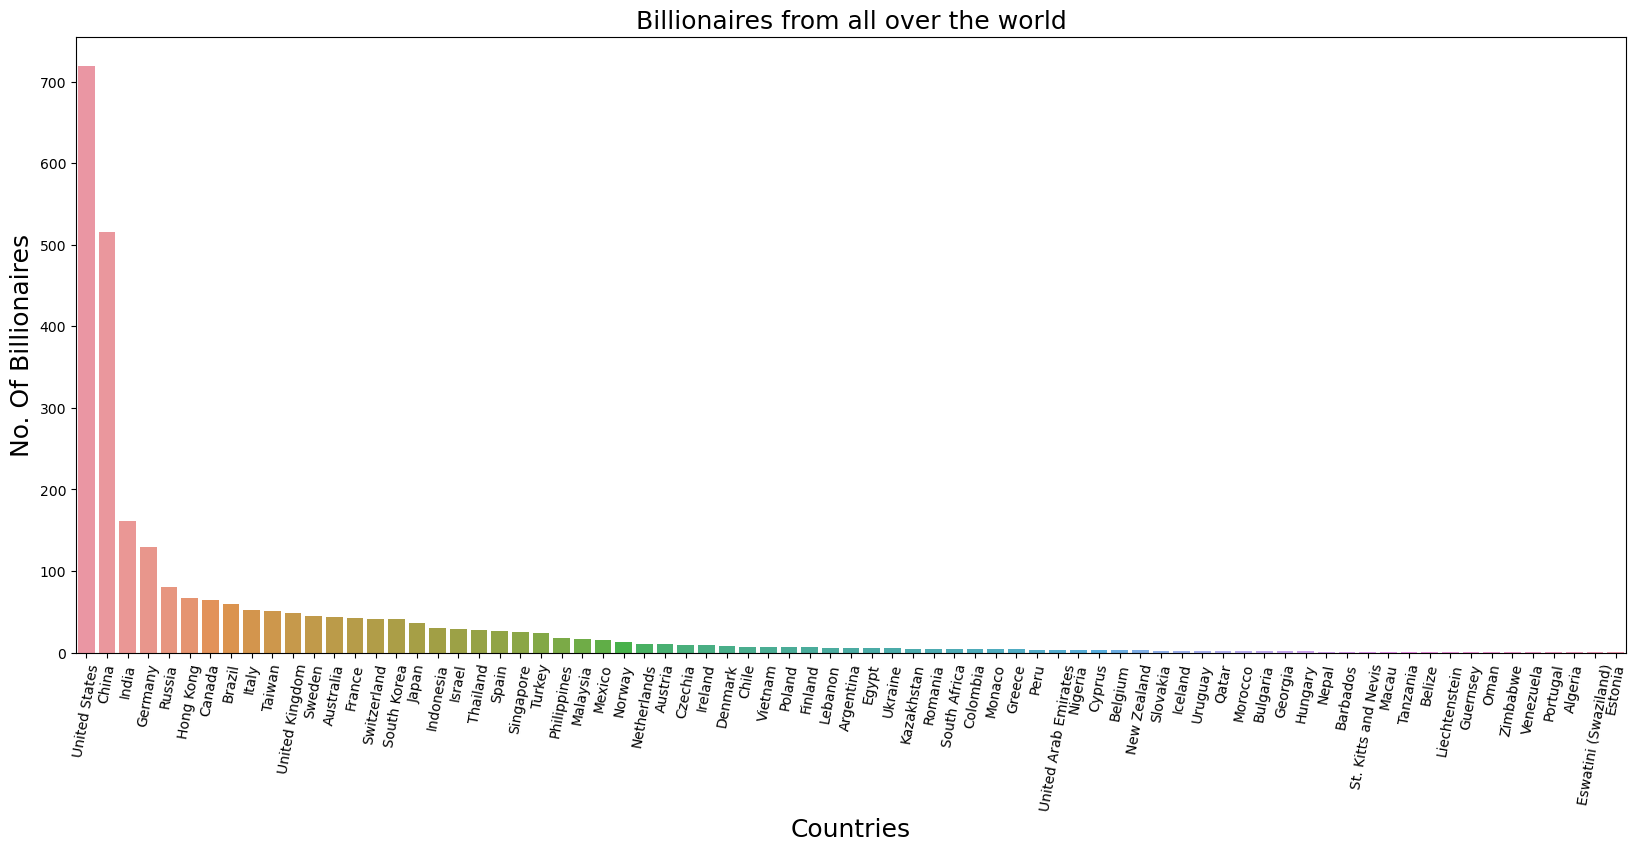

In [28]:
#Top 10 Countries with Most Billionaires
import seaborn as sns
plt.figure(figsize=(20,8))

sns.countplot( data=df, x="Country", order=df['Country'].value_counts().index)
plt.xticks(rotation=80)
plt.xlabel('Countries',fontsize=18)
plt.ylabel('No. Of Billionaires',fontsize=18)
plt.title('Billionaires from all over the world',fontsize=18)
plt.show()

In [30]:
# Top 10 countries with most billionaires
df['Country'].value_counts().nlargest(10)

United States    719
China            515
India            161
Germany          130
Russia            81
Hong Kong         67
Canada            64
Brazil            60
Italy             52
Taiwan            51
Name: Country, dtype: int64

In [33]:
# Top 10 countries with less billionaires
df['Country'].value_counts().nsmallest(5)

Nepal                  1
Barbados               1
St. Kitts and Nevis    1
Macau                  1
Tanzania               1
Name: Country, dtype: int64

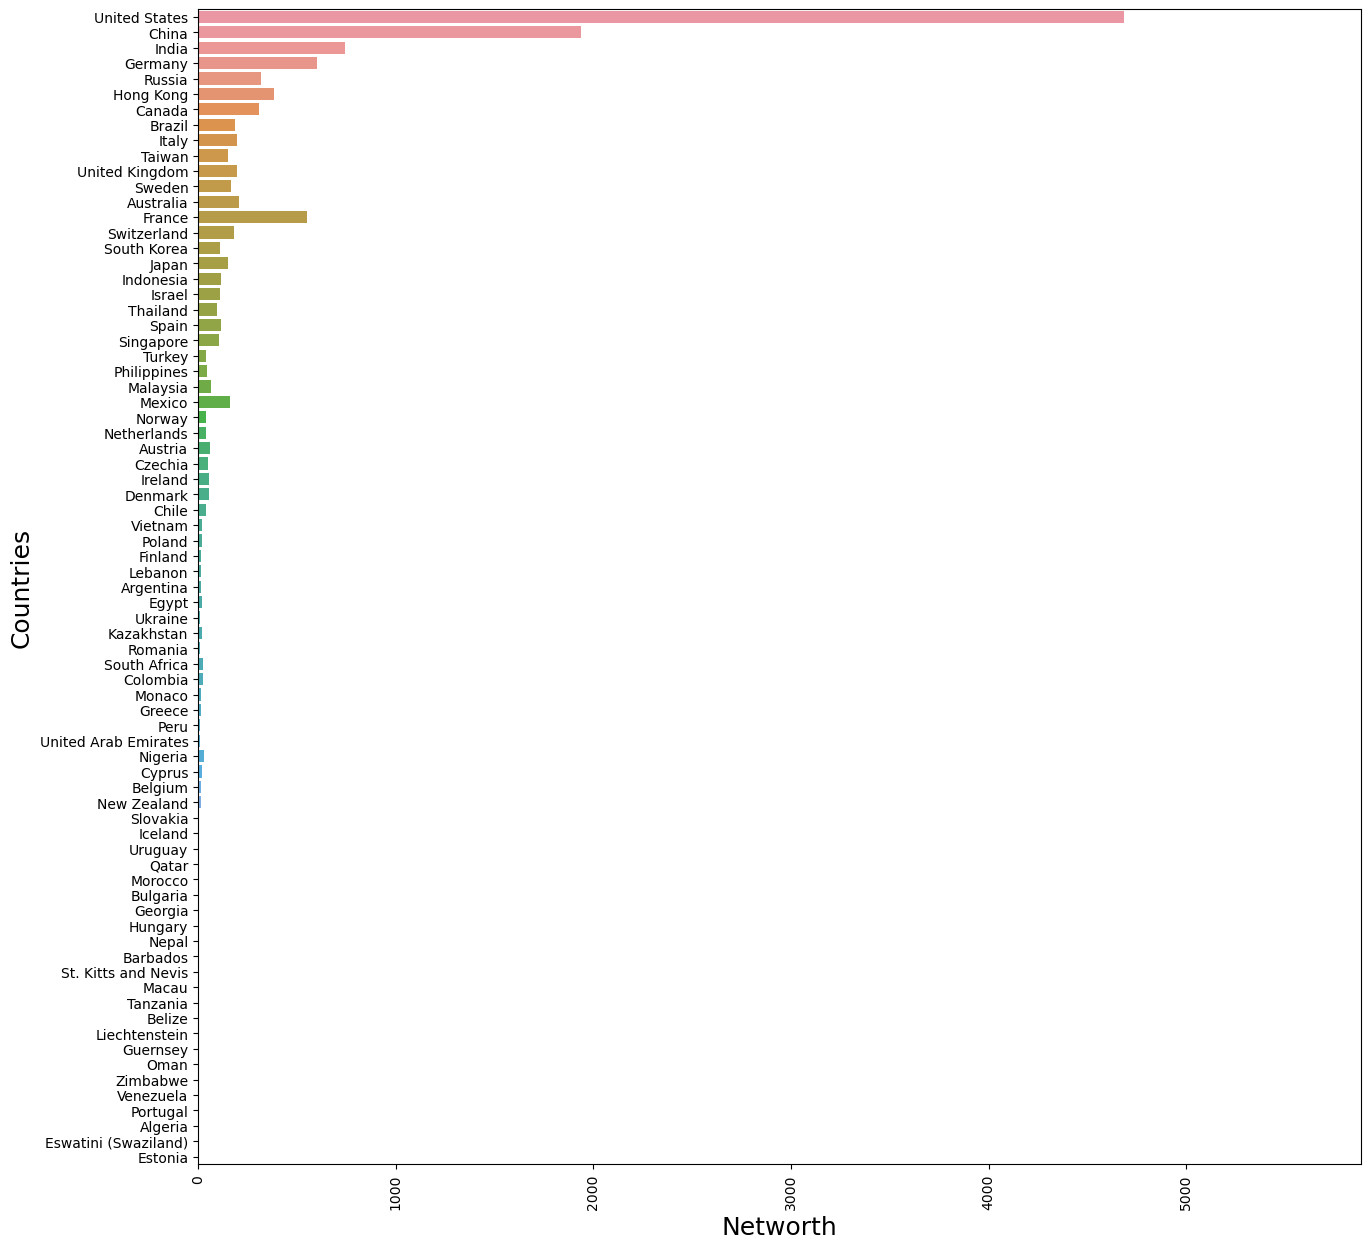

In [38]:
#Is the country with the most billionaires the one with the most wealth?
plt.figure(figsize=(15,15))
sns.barplot( data=df, x = "Networth", y = "Country", order=df['Country'].value_counts().index, estimator = sum, errwidth = 0)
plt.xticks(rotation=90)
plt.xlabel('Networth', fontsize=18)
plt.ylabel('Countries',fontsize=18)
plt.show()

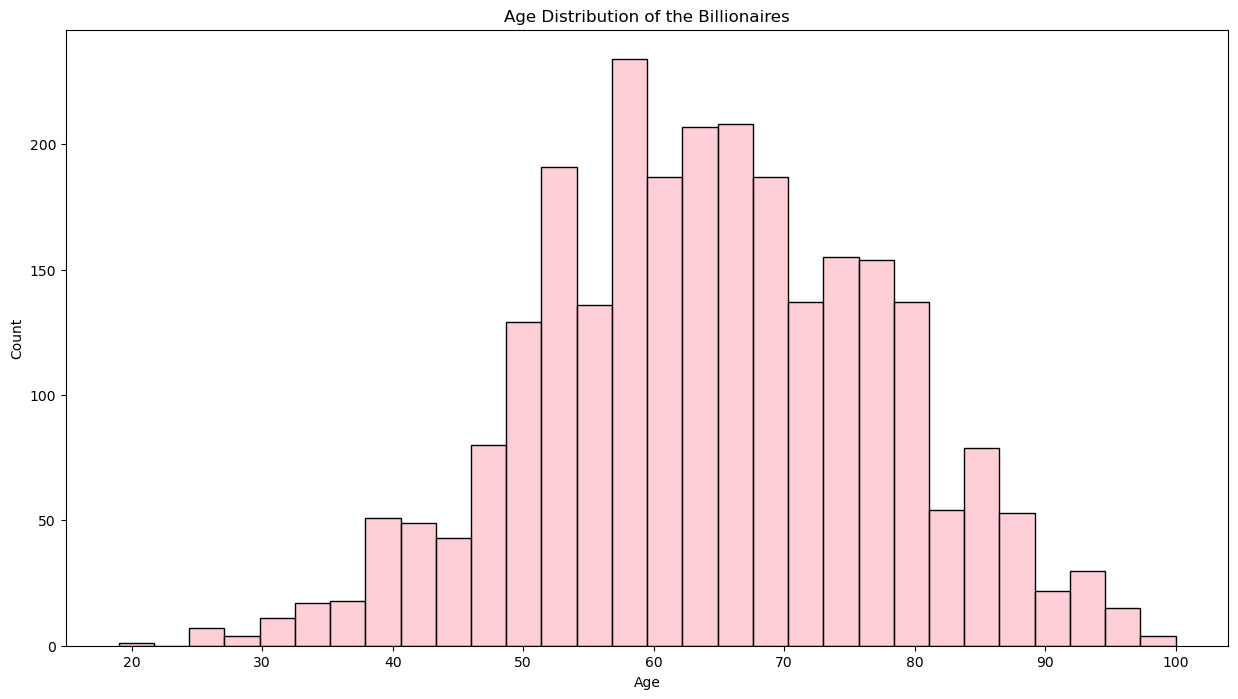

In [46]:
#How old are billionairs?
plt.figure(figsize=(15,8))
sns.histplot(data = df, x = "Age", color = "pink")
plt.title('Age Distribution of the Billionaires')
plt.show()

In [ ]:
#Most of the Billionaires belongs to 50-70 years of age group. lets check who is youngest billionaire.

In [49]:
#Who is the Youngest Billionaire?
df.loc[df.Age == df.Age.min()]

,Rank,Name,Networth,Age,Country,Source,Industry
1311,1292,Kevin David Lehmann,2.4,19,Germany,drugstores,Fashion & Retail


In [50]:
#Who is the eldest Billionaire?
df.loc[df.Age == df.Age.max()]

,Rank,Name,Networth,Age,Country,Source,Industry
1681,1645,George Joseph,1.8,100,United States,insurance,Finance & Investments


In [56]:
#Age Group of Billionaires?
df['age_group'] = pd.cut(df['Age'], bins = [18,30,50,70,100], include_lowest  = True, labels = 
['18-30', '30-50', '50-70', '70+'])
df.head()

,Rank,Name,Networth,Age,Country,Source,Industry,age group,age_group
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive,30-50,30-50
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology,50-70,50-70
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail,70+,70+
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology,50-70,50-70
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments,70+,70+


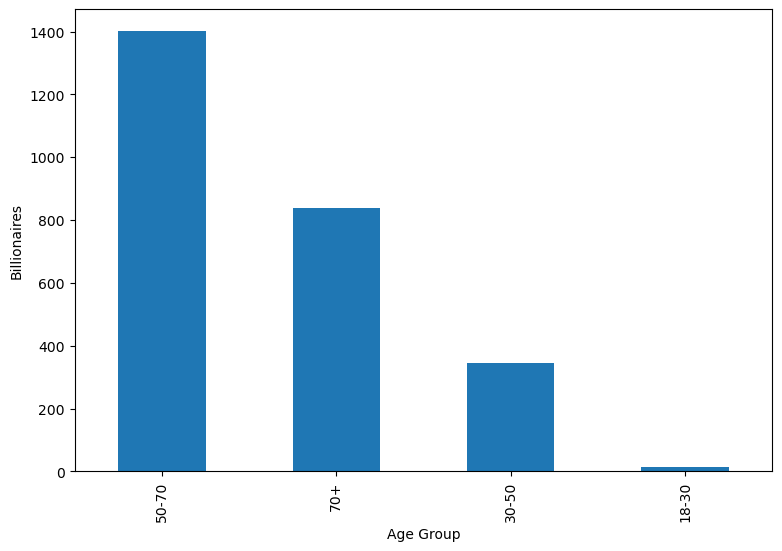

In [61]:
df['age_group'].value_counts().plot(kind = 'bar' , figsize = (9,6))
plt.xlabel('Age Group')
plt.ylabel('Billionaires')
plt.show()

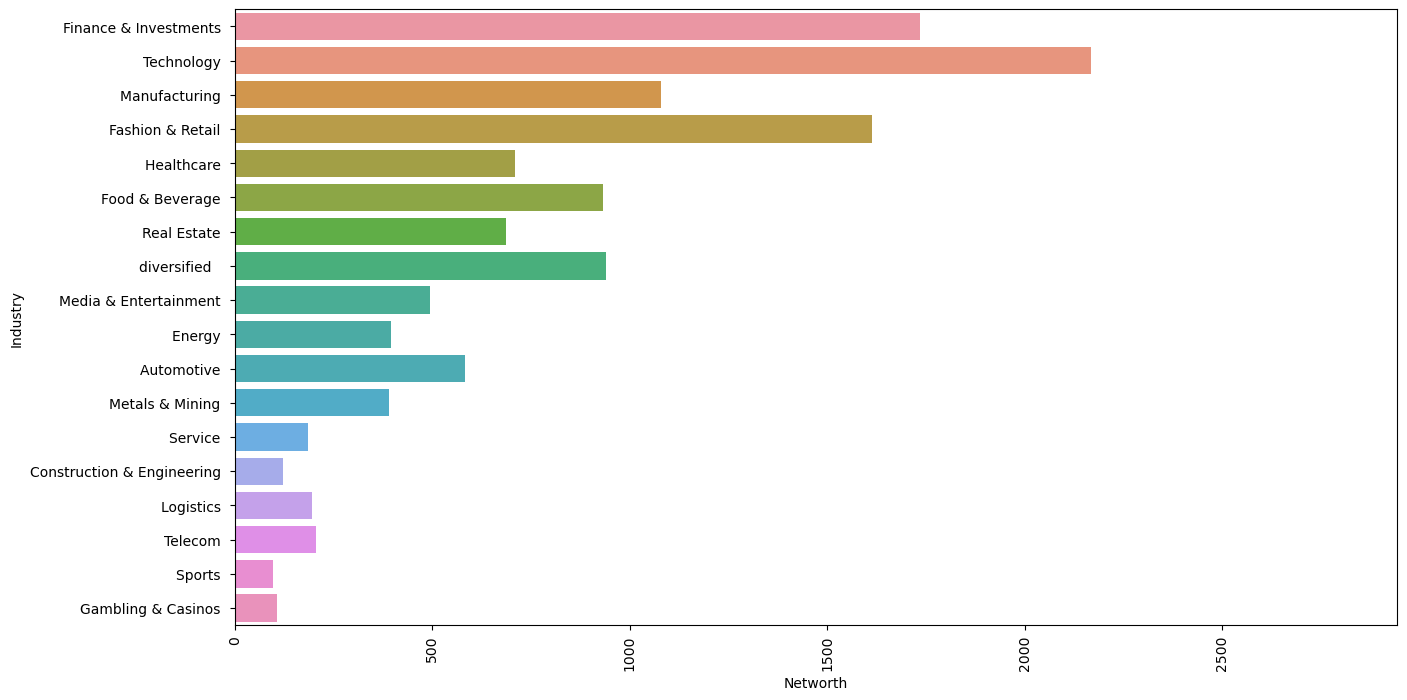

In [66]:
plt.figure( figsize = (15,8))
sns.barplot( data = df, x = "Networth", y = "Industry", order = df['Industry'].value_counts().index,  estimator = sum, errwidth = 0 )
plt.xticks(rotation= 90)
plt.xlabel('Networth')
plt.ylabel('Industry')
plt.show()

In [67]:
#Top 5 Billionaires from India ?
indians =df[df['Country'] == 'India']

In [68]:
tp5Indians = indians.sort_values('Networth', ascending = False).head()

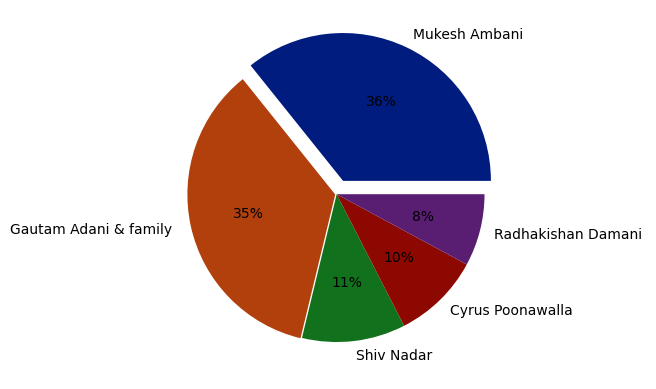

In [70]:
# declaring exploding pie
explode = [0.1, 0.01, 0, 0, 0]
# define Seaborn color palette to use
paletter_color = sns.color_palette('dark')

# plotting data on chart
plt.pie(tp5Indians['Networth'] , labels = tp5Indians['Name'], colors = paletter_color, explode = explode, autopct= '%.0f%%')
plt.show()

In [76]:
US = df[df['Country'] == 'United States']

In [77]:
top5UnitedStates=US.sort_values('Networth', ascending = False ).head() 

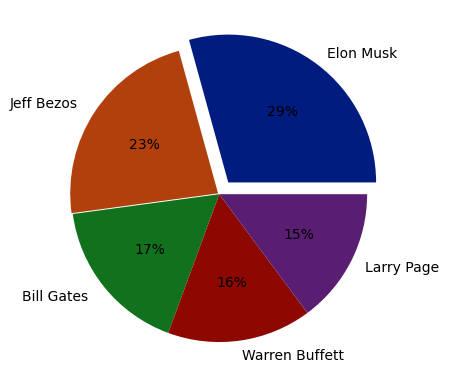

In [79]:
plt.pie(top5UnitedStates['Networth'], labels = top5UnitedStates['Name'], colors= paletter_color, explode = explode, autopct = '%.0f%%' )
plt.show()

In [80]:
df.corr()

,Rank,Networth,Age
Rank,1.000000,-0.439071,-0.124947
Networth,-0.439071,1.000000,0.039966
Age,-0.124947,0.039966,1.000000


In [82]:
df.corr(method= 'pearson')

,Rank,Networth,Age
Rank,1.000000,-0.439071,-0.124947
Networth,-0.439071,1.000000,0.039966
Age,-0.124947,0.039966,1.000000


In [83]:
df.corr(method = 'kendall')

,Rank,Networth,Age
Rank,1.000000,-1.000000,-0.084787
Networth,-1.000000,1.000000,0.084787
Age,-0.084787,0.084787,1.000000


In [84]:
df.corr(method = 'spearman')

,Rank,Networth,Age
Rank,1.000000,-1.000000,-0.123911
Networth,-1.000000,1.000000,0.123911
Age,-0.123911,0.123911,1.000000


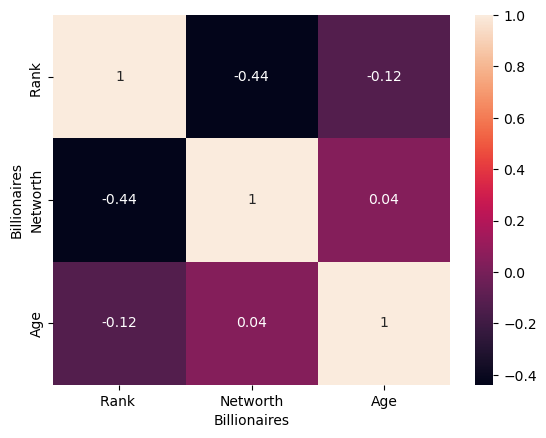

In [85]:
correlate_matrix = df.corr()
sns.heatmap(df.corr() ,annot = True )
plt.xlabel('Billionaires')
plt.ylabel('Billionaires')
plt.show()
